In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import cmap
import cartopy.feature as cFeature

## Load downscaled data

In [ ]:
# Define dataset specifics

model_scenario_name = 'MRI-ESM2-0_ssp245' # Choose a model and SSP scenario
area_name = 'europe_1' # Choose an area

# Defines start and end of time slice by picking 20 years before and 20 years after abrupt SPG cooling
if model_scenario_name == 'NorESM2-LM_ssp126':
    start_time = '2015-01-01'; end_time = '2055-01-01'
    cooling_year = '2035-01-01'
    time_array = np.arange(2015, 2055, 1)
elif model_scenario_name == 'CESM2-WACCM_ssp126':
    start_time = '2020-01-01'; end_time = '2060-01-01'
    cooling_year = '2040-01-01'
    time_array = np.arange(2020, 2060, 1)
elif model_scenario_name == 'MRI-ESM2-0_ssp245':
    start_time = '2020-01-01'; end_time = '2060-01-01'
    cooling_year = '2040-01-01'
    time_array = np.arange(2020, 2060, 1)
else:
    print("This dataset is not considered in the current study, but can be added to the analysis")

if area_name == 'norway':
    southern_lat = 57; northern_lat = 72
    western_lon = 2.5; eastern_lon = 33
elif area_name == 'germany':
    southern_lat = 46.5; northern_lat = 55.5
    western_lon = 5; eastern_lon = 15
elif area_name == 'europe':
    southern_lat = 37; northern_lat = 72
    western_lon = 0; eastern_lon = 33
elif area_name == 'europe_1':
    southern_lat = 37; northern_lat = 72
    western_lon = 310; eastern_lon = 33        
elif area_name == 'global':
    southern_lat = -90; northern_lat = 90
    western_lon = 0; eastern_lon = 360
else:
    print("This area is not predefined in the current study, but can be added to the analysis")

data_folder = '../NASA_data/' # Folder where downloaded downscaled CMIP6 data is stored


# Load mean daily temperature data

files = glob.glob(data_folder+'tas_day_'+model_scenario_name+'*')
files.sort()
tas = xr.open_mfdataset(files)
tas

if area_name == 'europe_1':
    temp1 = tas.tas.sel(lat=slice(southern_lat, northern_lat), 
                        lon=slice(western_lon, 360), 
                        time=slice(start_time, end_time))
    temp2 = tas.tas.sel(lat=slice(southern_lat, northern_lat), 
                        lon=slice(0, eastern_lon), 
                        time=slice(start_time, end_time))

    temp = xr.concat([temp1, temp2], dim='lon')
else:
    temp = tas.tas.sel(lat=slice(southern_lat, northern_lat), 
                        lon=slice(western_lon, eastern_lon), 
                        time=slice(start_time, end_time))
temp.load()

## Visualize data

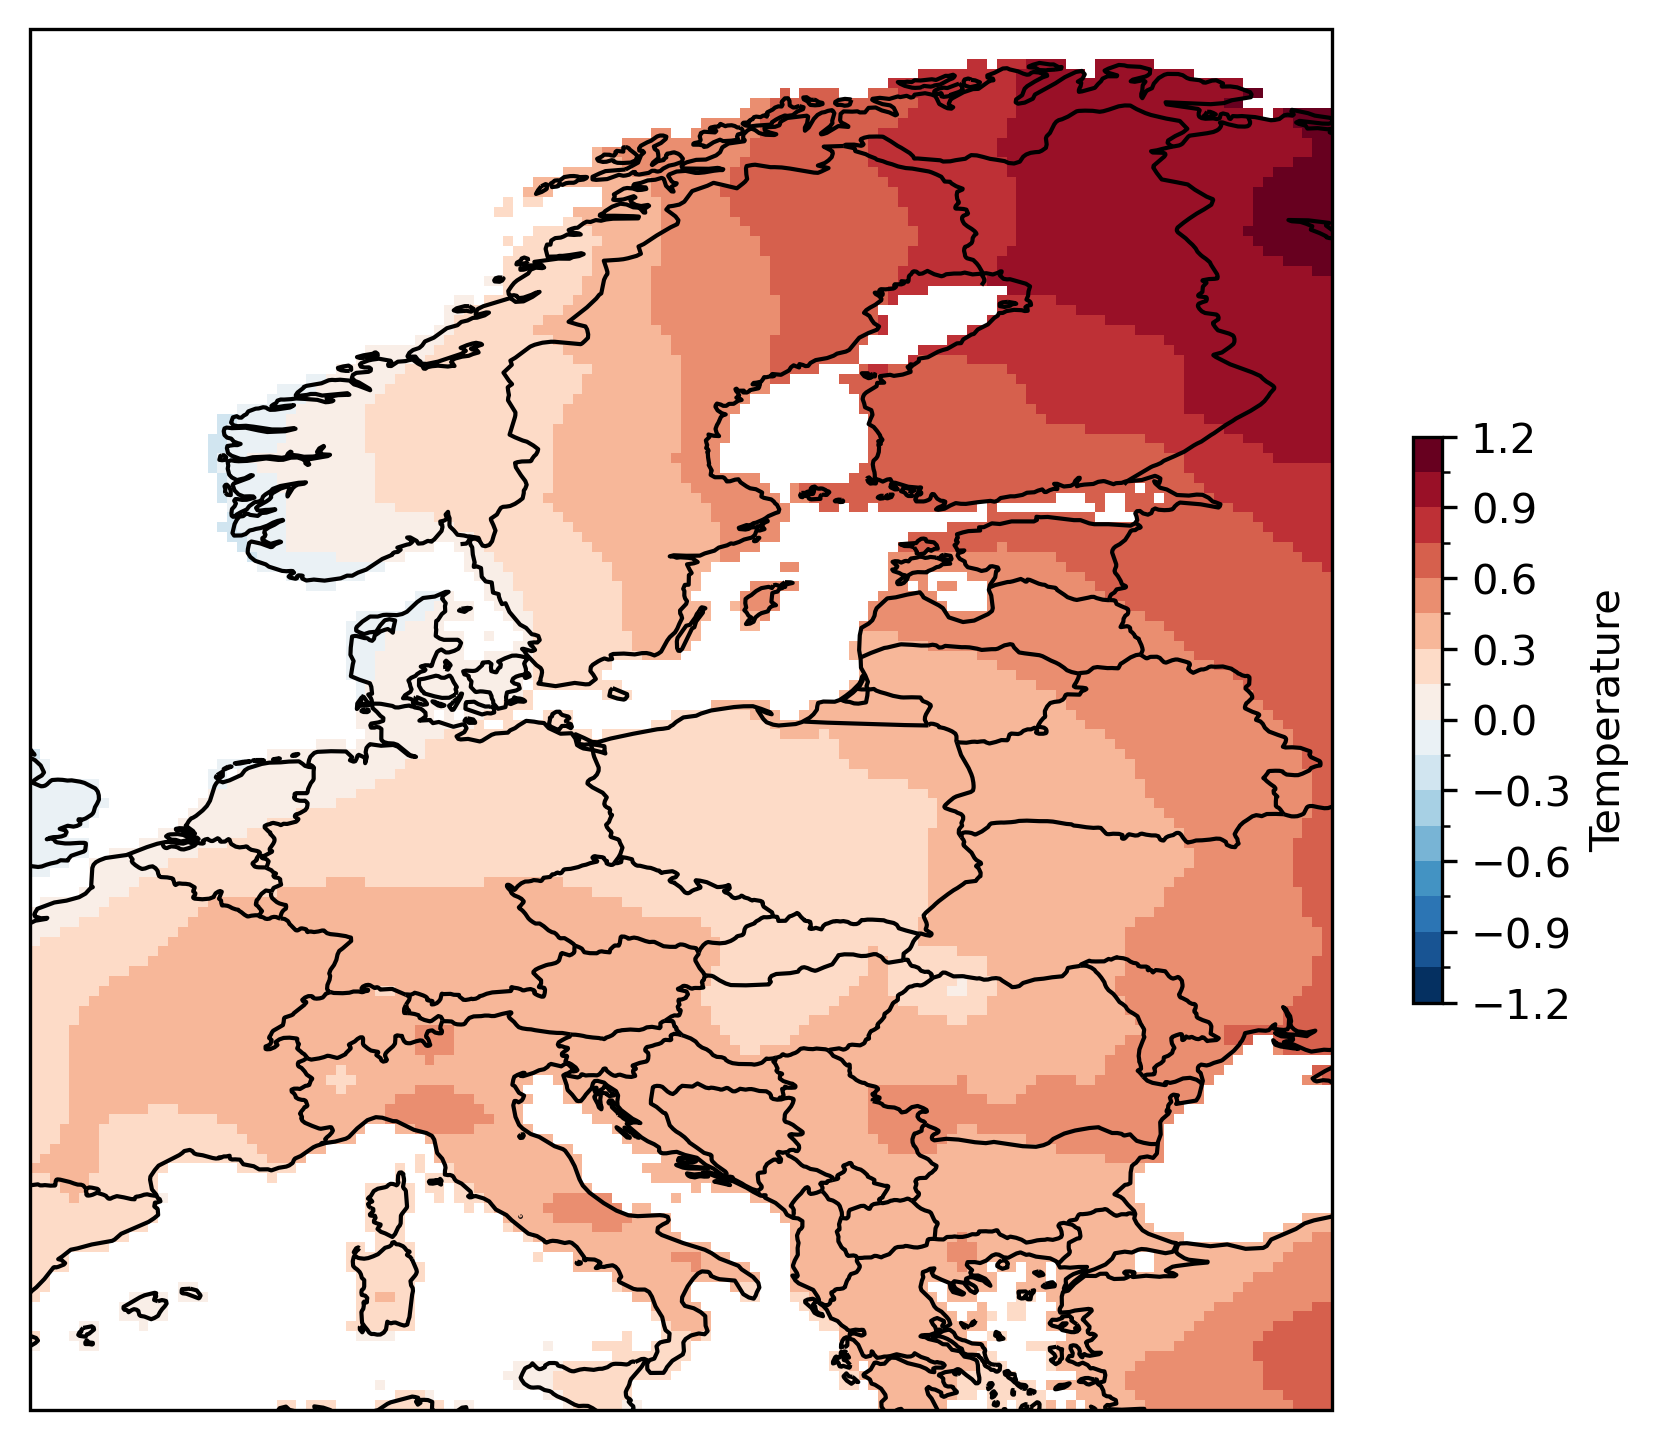

In [5]:
cooling_year = '2040-01-01'
# Plot difference map
fig = plt.figure(1, figsize=(7,7),dpi=300)
ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
data = temp.sel(time=slice(cooling_year, end_time)).mean('time') - temp.sel(time=slice(start_time, cooling_year)).mean('time')

map = data.plot(ax=ax, 
                transform=ccrs.PlateCarree(),levels=21, 
                cbar_kwargs={'orientation':'vertical','shrink':0.35, 'aspect':20,'label':'Temperature'})
ax.coastlines()
ax.add_feature(cFeature.BORDERS)
plt.show()

In [ ]:
fig = plt.figure(figsize=[7, 7], dpi=300)
ax = plt.axes(projection=ccrs.Orthographic(0,40))
ax.set_global()
diff = temp.isel(time=0)
map = diff.plot(ax=ax, 
            transform=ccrs.PlateCarree(),levels=levels,
            cbar_kwargs={'orientation':'vertical','shrink':0.6, 'aspect':10,'label':'Temperature'})
ax.coastlines()
ax.add_feature(cFeature.BORDERS)
fig.tight_layout()
plt.show()

## Compute climatologies for major cities

<xarray.DataArray 'time' (time: 14611)> Size: 117kB
array(['2020-01-01T12:00:00.000000000', '2020-01-02T12:00:00.000000000',
       '2020-01-03T12:00:00.000000000', ..., '2059-12-30T12:00:00.000000000',
       '2059-12-31T12:00:00.000000000', '2060-01-01T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 117kB 2020-01-01T12:00:00 ... 2060-01-01T1...
Attributes:
    axis:           T
    long_name:      time
    standard_name:  time


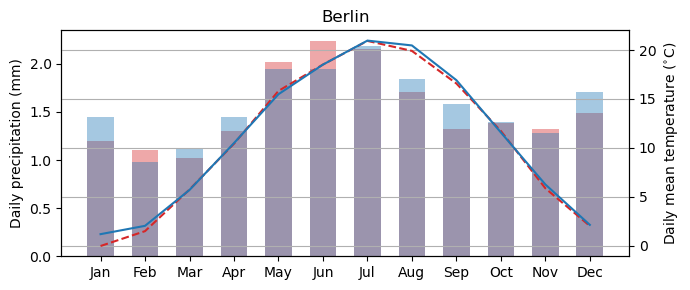

<xarray.DataArray 'time' (time: 14611)> Size: 117kB
array(['2020-01-01T12:00:00.000000000', '2020-01-02T12:00:00.000000000',
       '2020-01-03T12:00:00.000000000', ..., '2059-12-30T12:00:00.000000000',
       '2059-12-31T12:00:00.000000000', '2060-01-01T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 117kB 2020-01-01T12:00:00 ... 2060-01-01T1...
Attributes:
    axis:           T
    long_name:      time
    standard_name:  time


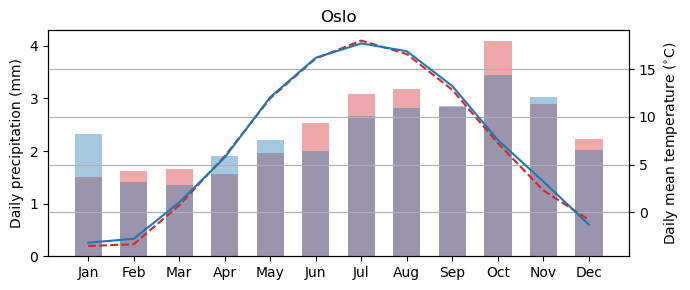

<xarray.DataArray 'time' (time: 14611)> Size: 117kB
array(['2020-01-01T12:00:00.000000000', '2020-01-02T12:00:00.000000000',
       '2020-01-03T12:00:00.000000000', ..., '2059-12-30T12:00:00.000000000',
       '2059-12-31T12:00:00.000000000', '2060-01-01T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 117kB 2020-01-01T12:00:00 ... 2060-01-01T1...
Attributes:
    axis:           T
    long_name:      time
    standard_name:  time


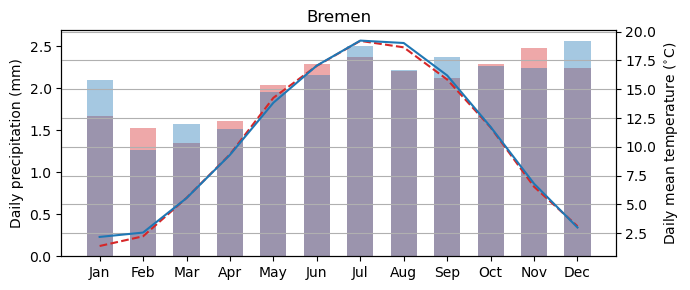

<xarray.DataArray 'time' (time: 14611)> Size: 117kB
array(['2020-01-01T12:00:00.000000000', '2020-01-02T12:00:00.000000000',
       '2020-01-03T12:00:00.000000000', ..., '2059-12-30T12:00:00.000000000',
       '2059-12-31T12:00:00.000000000', '2060-01-01T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 117kB 2020-01-01T12:00:00 ... 2060-01-01T1...
Attributes:
    axis:           T
    long_name:      time
    standard_name:  time


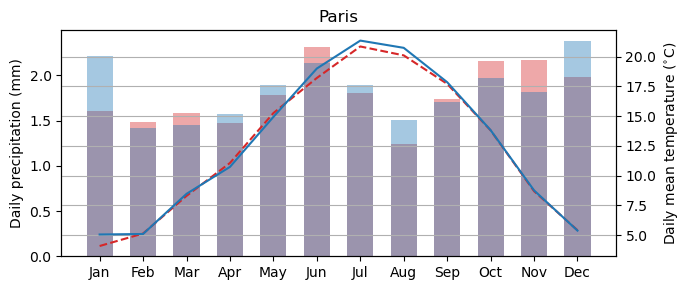

In [45]:
# Define dataset specifics

model_scenario_name = 'MRI-ESM2-0_ssp245' # Choose a model and SSP scenario
area_names = ['Berlin', 'Oslo', 'Bremen', 'Paris'] # Choose an area

# Defines start and end of time slice by picking 20 years before and 20 years after abrupt SPG cooling
if model_scenario_name == 'MRI-ESM2-0_ssp245':
    start_time = '2020-01-01'; end_time = '2060-01-01'
    cooling_year = '2040-01-01'
    time_array = np.arange(2020, 2060, 1)

#elif model_scenario_name == 'NorESM2-LM_ssp126':
#    start_time = '2015-01-01'; end_time = '2055-01-01'
#    cooling_year = '2035-01-01'
#    time_array = np.arange(2015, 2055, 1)
#elif model_scenario_name == 'CESM2-WACCM_ssp126':
#    start_time = '2020-01-01'; end_time = '2060-01-01'
#    cooling_year = '2040-01-01'
#    time_array = np.arange(2020, 2060, 1)

else:
    print("This dataset is not considered in the current study, but can be added to the analysis")

for area_name in area_names:
    if area_name == 'Berlin':
        southern_lat = 52.30; northern_lat = 52.66
        western_lon = 13.03; eastern_lon = 13.73
    elif area_name == 'Oslo':
        southern_lat = 59.83; northern_lat = 60.10
        western_lon = 10.52; eastern_lon = 10.94
    elif area_name == 'Bremen':
        southern_lat = 52.97; northern_lat = 53.3 
        western_lon = 8.43; eastern_lon = 9.03  
    elif area_name == 'London':
        southern_lat = 51.3; northern_lat = 51.63
        western_lon = 359.6; eastern_lon = 0.13
    elif area_name == 'Paris':
        southern_lat = 48.6; northern_lat = 50.0
        western_lon = 2.05; eastern_lon = 2.63   
    else:
        print("This area is not predefined in the current study, but can be added to the analysis")

    data_folder = '../NASA_data/' # Folder where downloaded downscaled CMIP6 data is stored
    save_folder = '../figures/climatologies/' # Folder where climatologies should be saved
    os.makedirs(save_folder, exist_ok=True) 


    # Load mean daily temperature data

    files = glob.glob(data_folder+'tas_day_'+model_scenario_name+'*')
    files.sort()
    tas = xr.open_mfdataset(files)

    if area_name == 'London':
        temp1 = tas.tas.sel(lat=slice(southern_lat, northern_lat), 
                            lon=slice(western_lon, 360), 
                            time=slice(start_time, end_time))
        temp2 = tas.tas.sel(lat=slice(southern_lat, northern_lat), 
                            lon=slice(0, eastern_lon), 
                            time=slice(start_time, end_time))

        temp = xr.concat([temp1, temp2], dim='lon')
    else:
        temp = tas.tas.sel(lat=slice(southern_lat, northern_lat), 
                            lon=slice(western_lon, eastern_lon), 
                            time=slice(start_time, end_time))
    temp.load()

    # Load mean daily precipitation data

    files = glob.glob(data_folder+'pr_day_'+model_scenario_name+'*')
    files.sort()
    pr = xr.open_mfdataset(files)

    if area_name == 'London':
        precip1 = pr.sel(lat=slice(southern_lat, northern_lat), 
                            lon=slice(western_lon, 360), 
                            time=slice(start_time, end_time))
        precip2 = pr.sel(lat=slice(southern_lat, northern_lat), 
                            lon=slice(0, eastern_lon), 
                            time=slice(start_time, end_time))

        precip = xr.concat([precip1, precip2], dim='lon')
    else:
        precip = pr.sel(lat=slice(southern_lat, northern_lat), 
                            lon=slice(western_lon, eastern_lon), 
                            time=slice(start_time, end_time))
    # Convert precipitation flux from kg/m2/s to daily amount --> mm/day

    precip['pr'].values = precip.pr.values * 24*60*60
    precip = precip.pr

    # Divide time period into pre- and post cooling

    temp_pre_cooling = temp.sel(time=slice(start_time, cooling_year)).mean(['lat', 'lon'])
    temp_post_cooling = temp.sel(time=slice(cooling_year, end_time)).mean(['lat', 'lon'])
    pr_pre_cooling = precip.sel(time=slice(start_time, cooling_year)).mean(['lat', 'lon'])
    pr_post_cooling = precip.sel(time=slice(cooling_year, end_time)).mean(['lat', 'lon'])

    # Create climatology for both periods
    temp_pre_clim = temp_pre_cooling.groupby('time.month').mean('time')
    temp_post_clim = temp_post_cooling.groupby('time.month').mean('time')
    pr_pre_clim = pr_pre_cooling.groupby('time.month').mean('time')
    pr_post_clim = pr_post_cooling.groupby('time.month').mean('time')

    # Plot
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    fig, ax1 = plt.subplots(figsize=[7, 3])
    ax2 = ax1.twinx()
    ax1.bar(np.arange(1, 13, 1), pr_pre_clim, color='tab:red', alpha=0.4, width=0.6, label='Pre SPG cooling')
    ax1.bar(np.arange(1, 13, 1), pr_post_clim, color='tab:blue', alpha=0.4, width = 0.6, label='Post SPG cooling')
    ax1.set_ylabel('Daily precipitation (mm)')
    ax2.plot(np.arange(1, 13, 1), temp_pre_clim-273.15, linestyle='--', color='tab:red')
    ax2.plot(np.arange(1, 13, 1), temp_post_clim-273.15, linestyle='-', color='tab:blue')
    ax2.set_ylabel(r'Daily mean temperature ($^{\circ}$C)')
    plt.xticks(ticks=np.arange(1, 13, 1), labels=months)
    plt.grid()
    plt.title(area_name)
    fig.tight_layout()
    fig.savefig(save_folder+area_name+'.png')
    plt.show()

    # Add legend
    box = ax1.get_position()
    ax1.set_position([box.x0, box.y0 + box.height * 0.1,
                    box.width, box.height * 0.85])
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
            ncol=2)

    fig.savefig(save_folder+area_name+'_label.png')

    plt.show()